# Project Introduction

The Coursera dataset project focuses on analyzing various aspects of online course offerings and engagement metrics, particularly through data on courses, certificate types, ratings, difficulty levels, and student enrollment figures. With the growth in demand for online education, understanding the dynamics behind course popularity and student engagement has become crucial. This analysis aims to explore trends, preferences, and factors influencing student enrollment in different types of courses and certification programs on Coursera, one of the world’s leading online learning platforms.

The dataset includes information on:

- **Course Titles:** Descriptions of individual courses
- **Course Organizations:** Institutions or companies providing the courses
- **Certificate Types:** The nature of certification offered.
- **Course Ratings:** Average student ratings for each course
- **Difficulty Levels:** Ratings of courses based on learner difficulty
- **Enrollment Numbers:** The total number of students enrolled in each course

This dataset presents an opportunity to generate insights about user preferences and behaviour, which can inform future course offerings and marketing strategies for online learning platforms.



# Project Objectives

The primary objectives of this project are as follows:

- **Understand Enrollment Patterns:** Identify trends in student enrollment based on course characteristics such as ratings, difficulty level, and certificate type. This will provide insights into what attracts the highest student engagement.

- **Examine Course Popularity by Certificate Type:** Analyze whether specific certificate types, like Specializations or Professional Certificates, correlate with higher enrollments and ratings, highlighting preferred learning formats among users.

- **Evaluate Rating and Engagement Correlation:** Assess if higher-rated courses attract more enrollments and examine any notable patterns among courses with high ratings versus lower ratings.

- **Analyze Difficulty Level Preferences:** Investigate the relationship between course difficulty levels and enrollment numbers to determine whether beginner, intermediate, or advanced courses are more popular among Coursera users.



# Steps

The first step carried out was to download the ‘Coursera Course’ dataset from Kaggle [https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset]

The dataset was imported to Jupyter Notebook for cleaning and analysis. I created a copy of the original dataset to ensure that the original data is kept as it is while working on the copied data. The copied dataset is named “coursera_new”.


import libraries

In [204]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline



from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected = True)
cf.go_offline()

### Read the csv file and summarize

In [45]:
coursera = pd.read_csv("/Users/adisabayo/Desktop/Python_workbook/coursera_project/coursea_data.csv", index_col="Unnamed: 0")

coursera.reset_index(drop=True, inplace=True)

In [46]:
coursera.head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


Check the number of observations and features

In [70]:
coursera.shape

(891, 6)

# Data cleaning and verification

The data cleaning processes include:

-1. Proper indexing: I dropped the original indexing that came with the dataset, and created a cleaner index column that is also properly sorted.

-2. Standardization of ‘course_enrolled’: This column has values like "5.3k", "130k", “3.2m” etc. I converted these into numeric values (integers) by replacing "k" with "000" and “m” with “000,000”  for proper analysis.

-3. Consistent column naming convention: The original dataset has the ‘course_Certificate_type' column, renamed 'course_certificate_type' to follow the naming convention used for the other columns.

-4. Certificate type normalization: I ensure consistency in the certificate types by making sure that they are all in the same format– here, I used Capitalization.

-5. Checking the summary and the datatype for all the features in the dataset: I used the .info() function to check if the features have been formatted to the right data types (objects, floats, and integers) and formats. 

-6. Verification of null values: I used the .isnull() to check if there are any null values in the dataset. The data has no null values.

-7. Verification of duplicates: I used the ..duplicated() to check if there are any duplicated values in the dataset. The data has no duplicated values.

-8. Checking for outliers: I also used the .describe() function to check the summary of the numerical features in the dataset (that is course_rating and course_students_enrolled).



## Copying the original file and summarize


In [47]:
coursera_new = coursera.copy()

In [275]:
coursera_new.head()

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Specialization,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,Course,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,Course,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.8,Mixed,320000


Converting the 'k' and 'm' in course_students_enrolled to thousand and million, respectively. I also converted the datatype to integers

In [64]:
coursera_new['course_students_enrolled'] = coursera_new['course_students_enrolled'].apply(
    lambda x: float(x.replace('k', '')) * 1000 if isinstance(x, str) and 'k' in x else
              float(x.replace('m', '')) * 1000000 if isinstance(x, str) and 'm' in x else
              float(x)
)

# Ensure the column is numeric
coursera_new['course_students_enrolled'] = pd.to_numeric(coursera_new['course_students_enrolled'])

coursera_new['course_students_enrolled'] = coursera_new['course_students_enrolled'].astype(int)



In [274]:
coursera_new.head()

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Specialization,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,Course,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,Course,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.8,Mixed,320000


The process above converted the data in the 'course_students_enrolled' to intergers. 


## Renaming the 'course_Certificate_type' column to 'course_certificate_type'


In [89]:
coursera_new.rename(columns= {'course_Certificate_type' : 'course_certificate_type'}, inplace=True)
coursera_new.head()

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


The ‘course_Certificate_type' column was renamed to 'course_certificate_type'


## Normalization of course_certificate_type


In [290]:
coursera_new['course_certificate_type'] = coursera_new['course_certificate_type'].str.capitalize()

coursera_new.head()

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled,rating_group
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Specialization,4.7,Beginner,5300,4.5-4.9
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,4.7,Intermediate,17000,4.5-4.9
2,A Crash Course in Data Science,Johns Hopkins University,Course,4.5,Mixed,130000,4.5-4.9
3,A Law Student's Toolkit,Yale University,Course,4.7,Mixed,91000,4.5-4.9
4,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.8,Mixed,320000,4.5-4.9


Converted the 'course_certificate_type' values from uppercase to cap


## Checking the summary and the datatype for all the features in the dataset


In [90]:
coursera_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


The features are properly formatted and the datatypes are in the correct order


## Verification of null values


In [296]:
coursera_null = coursera_new.isnull().sum()
coursera_null

course_title                0
course_organization         0
course_certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
rating_group                2
dtype: int64

There are no null values.


## Verification of duplicates


In [93]:
duplicated_rows = coursera_new[coursera_new.duplicated()].sum()
duplicated_rows

course_title                  0
course_organization           0
course_certificate_type       0
course_rating               0.0
course_difficulty             0
course_students_enrolled      0
dtype: object

There are no duplicates.


## Outlier check


In [237]:
coursera_new.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


In [134]:
coursera_unique_ratings = coursera_new['course_rating'].unique()
coursera_unique_ratings

array([4.7, 4.5, 4.8, 4.6, 4.3, 4.4, 4.9, 4.2, 5. , 3.3, 4.1, 4. , 3.7,
       3.9])

In [145]:
filtered_courses = coursera_new[coursera_new['course_rating'].isin([5.0, 4.0])]

filtered_courses

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13000
598,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.0,Intermediate,33000




# Exploratory analysis


## Verification of unique values


In [94]:
unique_difficulty = coursera_new['course_difficulty'].unique()
unique_difficulty

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

**Difficulty levels**

- Beginner
- Intermediate
- Mixed
- Advanced


In [221]:
unique_certificate = coursera_new['course_certificate_type'].unique()
unique_certificate

array(['Specialization', 'Course', 'Professional certificate'],
      dtype=object)

**Course certificate types**

- Specialization
- Course
- Professional certificate



## The total number of the course organizations


In [129]:
unique_organization_count = unique_organization.count()
unique_organization_count

154


## Total number of enrolled students


In [268]:
no_of_enrolled_students = coursera_new['course_students_enrolled'].sum()
no_of_enrolled_students

80681900


## Top 10 course organizations and their respective counts (including bar chart)


In [244]:
unique_organization = coursera_new['course_organization'].value_counts()

unique_organization.head(10)


course_organization
University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
Name: count, dtype: int64

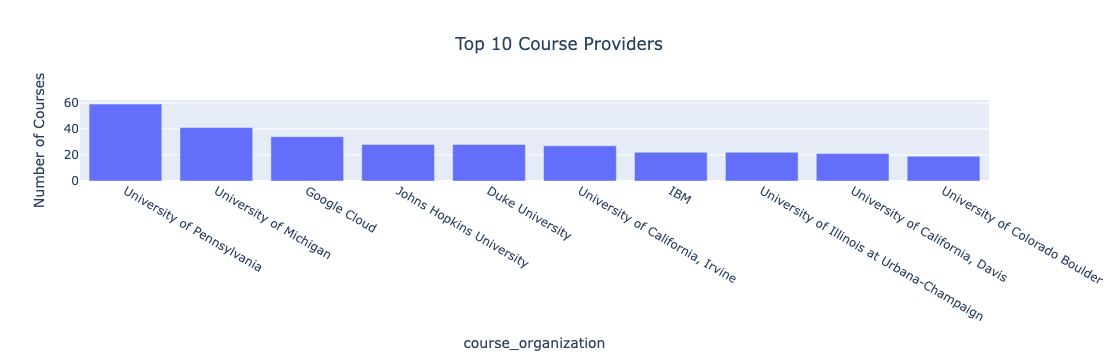

In [255]:
top_organizations = coursera_new['course_organization'].value_counts().head(10)

fig = px.bar(top_organizations, 
             x=top_organizations.index, 
             y=top_organizations.values, 
             labels={'x': 'Course Organization', 'y': 'Number of Courses'},
             title='Top 10 Course Providers')

fig.update_layout(title={'x': 0.5})

fig.show()


## Top 10 course organizations and the number of enrolled students (including bar chart)


In [257]:
organization_enrollment = coursera_new.groupby('course_organization')['course_students_enrolled'].sum()

top_organization = organization_enrollment.sort_values(ascending=False).reset_index()

top_organization.head(10)

,course_organization,course_students_enrolled
0,University of Michigan,7437700
1,University of Pennsylvania,5501300
2,Stanford University,4854000
3,"University of California, Irvine",4326000
4,Johns Hopkins University,4298900
5,Duke University,3967600
6,Yale University,3952000
7,IBM,2956400
8,deeplearning.ai,2863400
9,Google Cloud,2604300


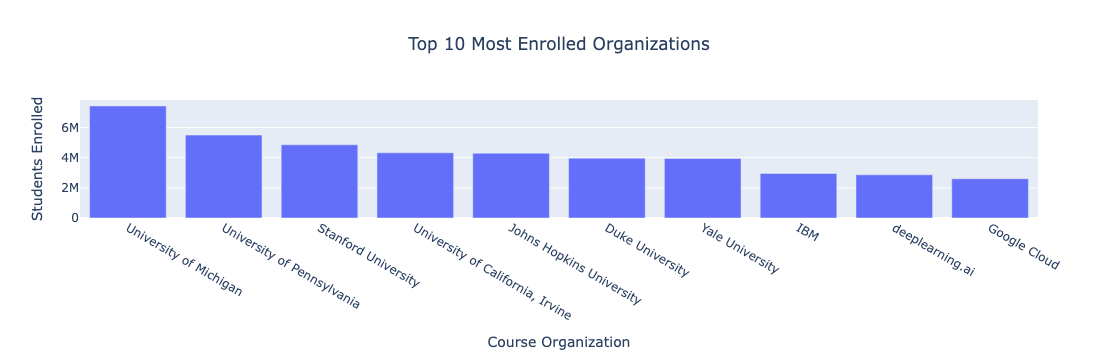

In [300]:
organization_enrollment = coursera_new.groupby('course_organization')['course_students_enrolled'].sum().reset_index()

top_organization = organization_enrollment.sort_values(by='course_students_enrolled', ascending=False).head(10)

fig = px.bar(top_organization, 
             x='course_organization', 
             y='course_students_enrolled', 
             title='Top 10 Most Enrolled Organizations',
             labels={'course_organization': 'Course Organization', \
                     'course_students_enrolled': 'Students Enrolled'})

fig.update_layout(title={'x': 0.5})

fig.show()


### Observations:

- University of Michigan and the University of Pennsylvania appear at the top in both course count and student enrollment, showing not only a large portfolio of courses but also high learner interest. Michigan, with fewer courses than Pennsylvania, has over 7.4 million enrollments, showing its courses are highly engaging or in demand.

- deeplearning.ai is notable with over 2.8 million enrollments from a smaller number of specialized courses. This suggests high interest in targeted, niche content (e.g., AI and deep learning) and indicates that learners are seeking skills in emerging tech fields.

- Stanford University and Yale University are unique cases with fewer overall courses but very high student enrollment counts (4.85 million and 3.95 million, respectively). This suggests that selective, well-recognized institutions can drive significant enrollment numbers even with a smaller selection of courses, likely due to brand prestige and course quality.

  
### Insights
-  Coursera could highlight partnerships with institutions like Michigan and Stanford in targeted marketing campaigns to boost enrollment by showcasing popular courses and the strong academic credibility of these schools.
  
-  Given that fewer but impactful courses can drive substantial enrollments (as with Stanford and Yale), Coursera might focus on developing high-quality, impactful courses that appeal to broad audiences, rather than solely increasing course numbers.



## Analysis of the course ratings


In [302]:
bin_edges = [3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0]
bin_labels = ['3.2-3.4', '3.4-3.6', '3.6-3.8', '3.8-4.0', '4.0-4.2', '4.2-4.4', '4.4-4.6', '4.6-4.8', '4.8-5.0']

coursera_new['rating_bins'] = pd.cut(coursera_new['course_rating'], bins=bin_edges, labels=bin_labels, right=False)

rating_distribution = coursera_new['rating_bins'].value_counts().sort_index()

rating_distribution


rating_bins
3.2-3.4      1
3.4-3.6      0
3.6-3.8      1
3.8-4.0      2
4.0-4.2      3
4.2-4.4     25
4.4-4.6    114
4.6-4.8    419
4.8-5.0    324
Name: count, dtype: int64

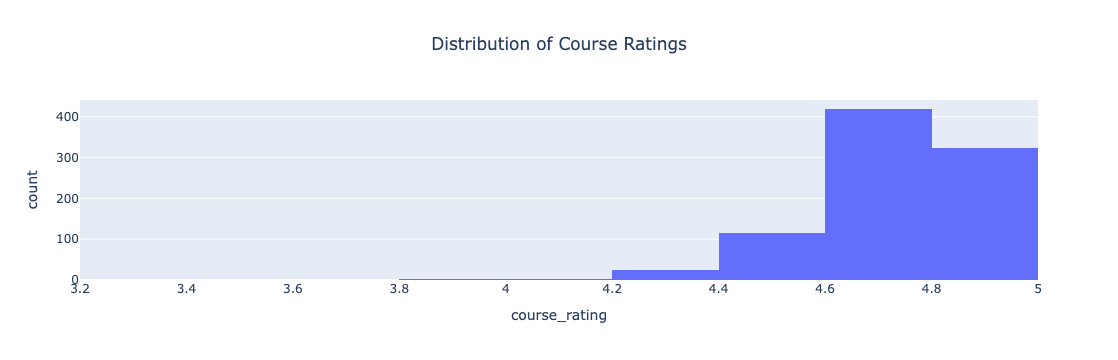

In [261]:
fig = px.histogram(coursera_new, x='course_rating', nbins=10, title='Distribution of Course Ratings')

fig.update_layout(title={'x': 0.5})

fig.show()

### Observations and Insights

- **Quality Assurance and Continuous Improvement:** Since most courses are well-rated, Coursera’s course quality seems high. 

- **Highlighting High-Quality Courses:** Coursera could consider showcasing courses in the top bins (4.6-5.0) as high-quality offerings, which could help attract new learners looking for tried-and-true courses.

- **Opportunities for Instructor Feedback:** For instructors with courses in lower bins, feedback and guidance could improve future iterations of the course.


## Top 20 most enrolled courses with their respective course providers


In [299]:
top_courses = coursera_new[['course_title', 'course_students_enrolled', 'course_organization']]\
.sort_values(by='course_students_enrolled', ascending=False)

top_courses.reset_index(drop=True, inplace=True)

top_courses.head(20)

,course_title,course_students_enrolled,course_organization
0,Machine Learning,3200000,Stanford University
1,The Science of Well-Being,2500000,Yale University
2,Python for Everybody,1500000,University of Michigan
3,Programming for Everybody (Getting Started wit...,1300000,University of Michigan
4,Data Science,830000,Johns Hopkins University
5,Career Success,790000,"University of California, Irvine"
6,English for Career Development,760000,University of Pennsylvania
7,Successful Negotiation: Essential Strategies a...,750000,University of Michigan
8,Data Science: Foundations using R,740000,Johns Hopkins University
9,Deep Learning,690000,deeplearning.ai


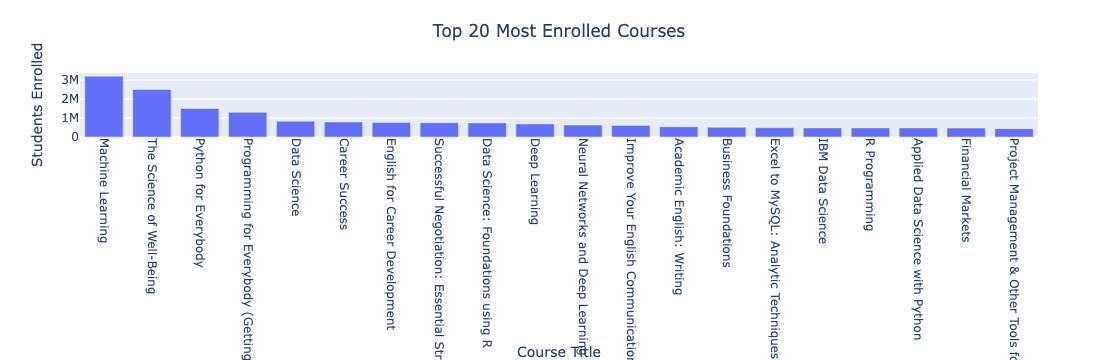

In [262]:
top_courses = coursera_new.sort_values(by='course_students_enrolled', ascending=False).head(20)

fig = px.bar(top_courses, 
             x='course_title', 
             y='course_students_enrolled', 
             title='Top 20 Most Enrolled Courses',
             labels={'course_title': 'Course Title', 'course_students_enrolled': 'Students Enrolled'})

fig.update_layout(title={'x': 0.5})

fig.update_xaxes(tickangle=90)

fig.show()

### Observations

- **Strong Interest in Tech and Data Skills:** Courses in machine learning, Python, data science, and deep learning lead in enrollment numbers, showing that students prioritize tech skills with a strong industry demand. This is valuable information for Coursera and providers looking to expand in these fields.
  
- **Reputation and Specialization Matter:** Institutions like Stanford and Yale, known for academic excellence, draw high enrollments even with fewer course offerings, likely due to their trusted reputation. Similarly, institutions specializing in specific skills, such as deeplearning.ai in AI, show that niche expertise is appealing to learners focused on specialized knowledge.

### Insights

- **Expand High-Demand Topics:** Coursera could further invest in creating or partnering for more courses in popular fields like data science, AI, and programming. For example, expanding offerings on advanced AI topics, cloud computing, or software engineering could meet the high demand.

- **Leverage Institutional Reputation:** Institutions with strong brand recognition and specific expertise should be highlighted in Coursera’s marketing strategies. Collaborating with prestigious universities and specialized organizations on unique topics could boost both course enrollments and platform visibility.
  



## Relationship between the course ratings and the number of enrolled students


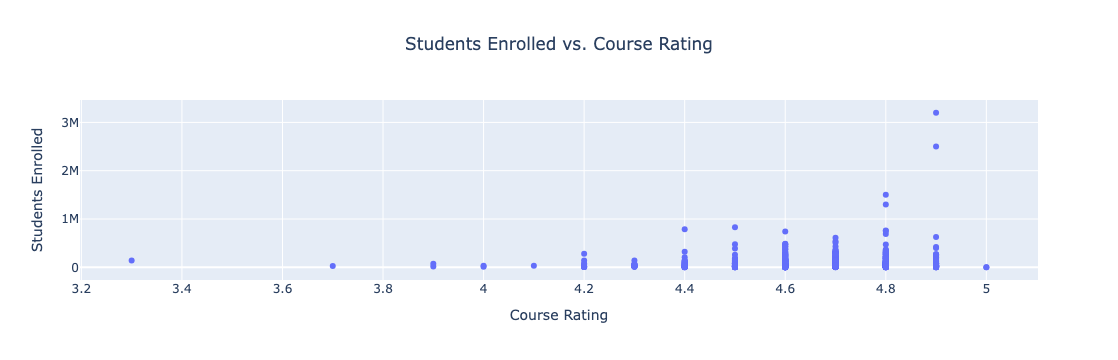

In [263]:
fig = px.scatter(coursera_new, 
                 x='course_rating', 
                 y='course_students_enrolled',
                 title='Students Enrolled vs. Course Rating',
                 labels={'course_rating': 'Course Rating', 'course_students_enrolled': 'Students Enrolled'})

fig.update_layout(title={'x': 0.5})

fig.show()

There is no direct relationship between the number of students enrolled and the course ratings.




## Correlation Heatmap between course rating and students enrolled (Seaborn + Plotly Hybrid)


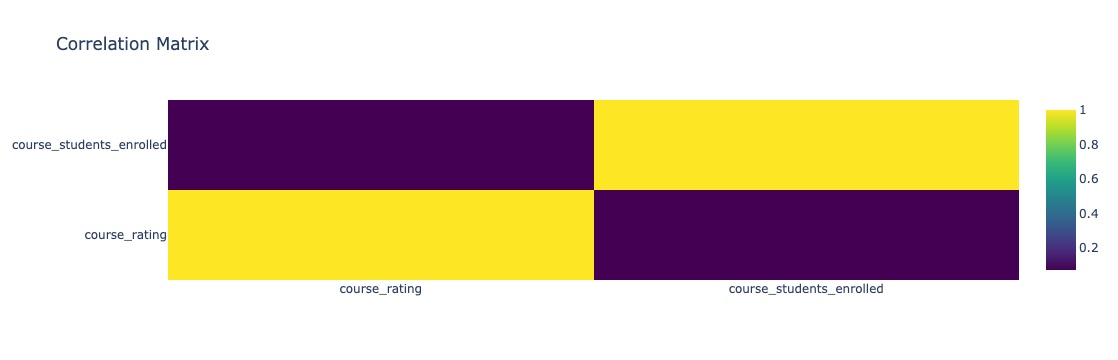

In [206]:
correlation = coursera_new[['course_rating', 'course_students_enrolled']].corr()

fig = go.Figure(data=go.Heatmap(
        z=correlation.values,
        x=correlation.columns,
        y=correlation.columns,
        colorscale='Viridis'))

fig.update_layout(title='Correlation Matrix')
fig.show()

In [276]:
correlation = coursera_new[['course_rating', 'course_students_enrolled']].corr()

correlation


,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


### Observations

The correlation matrix provides insights into the linear relationship between course_rating and course_students_enrolled:

Diagonal Values: Both course_rating and course_students_enrolled have a correlation of 1.000 with themselves, which is expected since each variable is perfectly correlated with itself.

Off-Diagonal Value (0.07109): The correlation coefficient between course_rating and course_students_enrolled is 0.07109. This value indicates a very weak positive correlation between the two variables.

Interpretation: A correlation coefficient close to zero means that course_rating and course_students_enrolled do not have a significant linear relationship. That is, the higher or lower ratings don’t necessarily influence enrollment numbers, or vice versa.




## Course certificate type analysis


In [190]:
specialaization_count = coursera_new['course_certificate_type'].value_counts()
specialaization_count

course_certificate_type
Course                      582
Specialization              297
Professional certificate     12
Name: count, dtype: int64

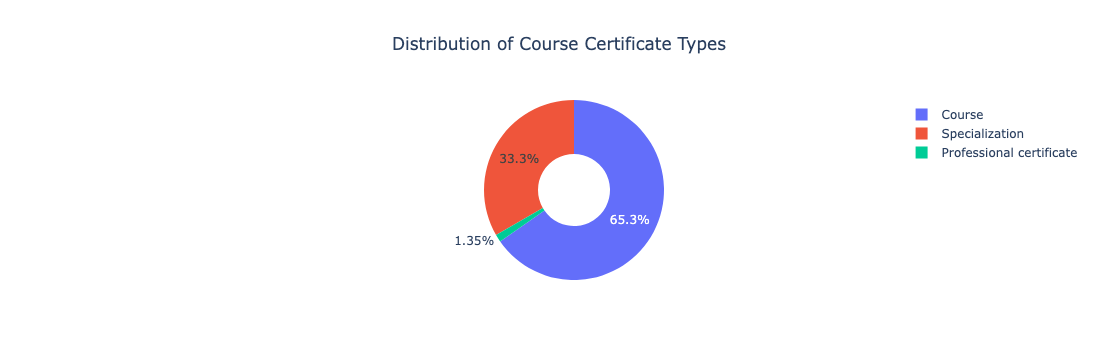

In [271]:
fig = px.pie(coursera_new, 
             names='course_certificate_type', 
             title='Distribution of Course Certificate Types',
             hole=0.4)  

fig.update_layout(title={'x': 0.5})

fig.show()


## Course certification count by no of enrolled students


In [198]:
certificate_count= coursera_new.groupby('course_certificate_type')['course_students_enrolled'].sum()

certificate_count

course_certificate_type
Course                      51131300
Professional certificate     2288400
Specialization              27262200
Name: course_students_enrolled, dtype: int64

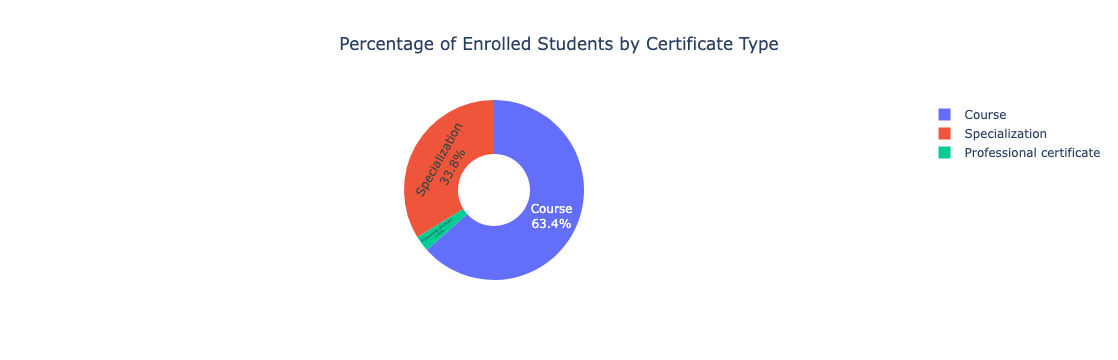

In [270]:
total_enrollment = certificate_count.sum()

# Create a pie chart with percentage labels formatted to 2 decimal places
fig = px.pie(
    names=certificate_count.index,
    values=certificate_count.values,
    title="Percentage of Enrolled Students by Certificate Type",
    labels={'names': 'Certificate Type', 'values': 'Enrollment Count'},
    hole=0.4
)


fig.update_traces(textposition='inside', textinfo='percent+label',
                  hovertemplate='%{label}: %{percent:.2%} (%{value})')


fig.update_layout(title={'x': 0.5})
fig.show()


__Box plot__

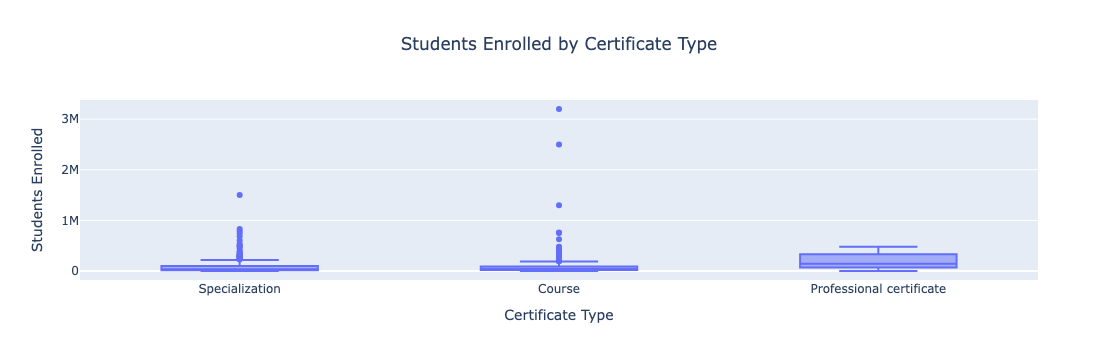

In [272]:
fig = px.box(coursera_new, 
             x='course_certificate_type', 
             y='course_students_enrolled', 
             title='Students Enrolled by Certificate Type',
             labels={'course_certificate_type': 'Certificate Type', \
                     'course_students_enrolled': 'Students Enrolled'})

fig.update_layout(title={'x': 0.5})

fig.show()


### Insights

- With their high enrollment, single courses could be marketed as flexible and low-commitment options, ideal for learners exploring new subjects. This approach would appeal to a broader audience, including those testing the waters before committing to more intensive specializations or professional certificates.

- Given the high enrollment per specialization, adding more structured learning paths would cater to learners seeking skill depth and professional readiness. Specializations in emerging fields like AI, cybersecurity, and data engineering could attract even more learners.




## Course difficulty analysis -- count and boxplot chart


In [213]:
course_difficulty_count = coursera_new.groupby('course_difficulty')['course_students_enrolled'].sum()
course_difficulty_count.sort_values(ascending = False)

course_difficulty
Beginner        39921800
Mixed           24989400
Intermediate    14506300
Advanced         1264400
Name: course_students_enrolled, dtype: int64

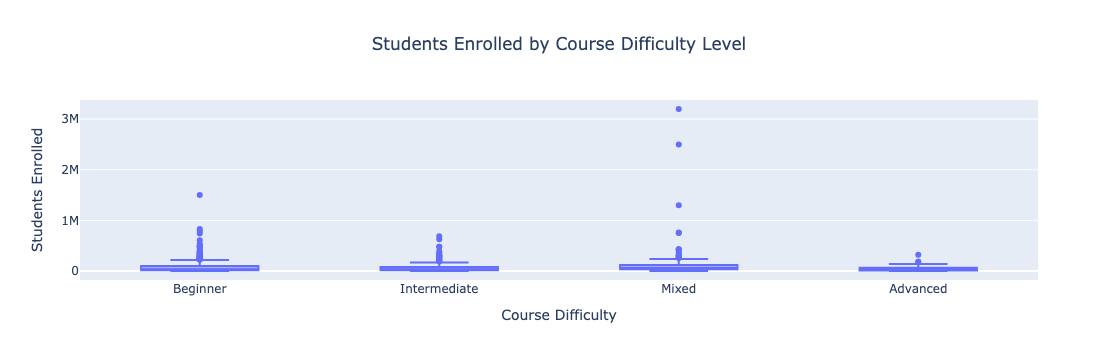

In [297]:
fig = px.box(coursera_new, 
             x='course_difficulty', 
             y='course_students_enrolled', 
             title='Students Enrolled by Course Difficulty Level',
             labels={'course_difficulty': 'Course Difficulty', \
                     'course_students_enrolled': 'Students Enrolled'})

fig.update_layout(title={'x': 0.5})

fig.show()


### Observations

Beginner-level courses have the highest enrollment, with nearly 40 million students, significantly more than any other difficulty level.
Beginner courses account for over 50% of total enrollments, indicating a strong preference for foundational learning among Coursera users.

### Insights

To guide learners from beginner to intermediate levels, Coursera could create curated learning paths, combining related beginner, intermediate, and possibly advanced courses. This approach could improve retention and progression across difficulty levels.



## Checking the relationship between the average ratings of certificate type and no. of enrollments


In [280]:
certificate_insights = coursera_new.groupby('course_certificate_type').agg({
    'course_rating': 'mean',  
    'course_students_enrolled': 'sum'  
}).sort_values(by='course_students_enrolled', ascending=False)  


certificate_insights

,course_rating,course_students_enrolled
course_certificate_type,,
Course,4.707045,51131300
Specialization,4.618182,27262200
Professional certificate,4.700000,2288400


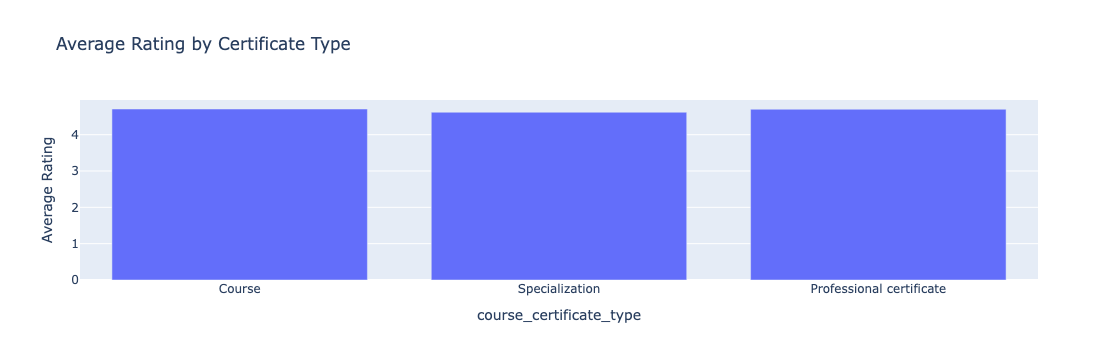

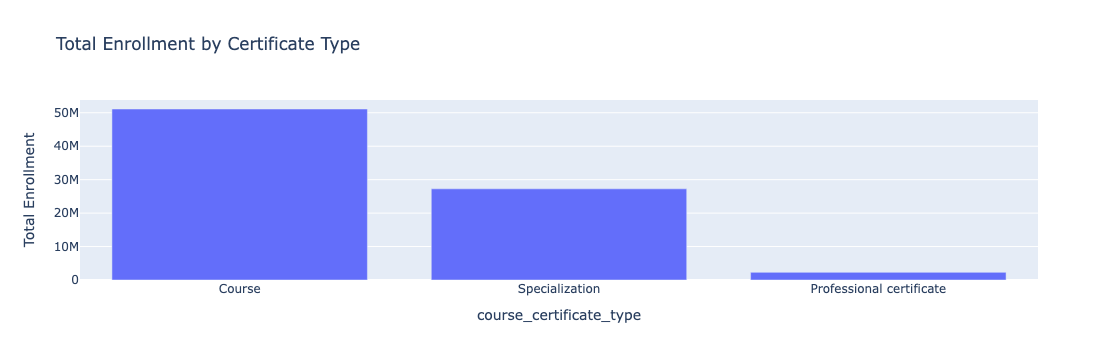

In [284]:
fig_rating = px.bar(certificate_insights, 
                    x=certificate_insights.index, 
                    y='course_rating',
                    title='Average Rating by Certificate Type',
                    labels={'x': 'Certificate Type', 'course_rating': 'Average Rating'})
fig_rating.show()

# Bar chart for total enrollments by certificate type
fig_enrollment = px.bar(certificate_insights, 
                        x=certificate_insights.index, 
                        y='course_students_enrolled',
                        title='Total Enrollment by Certificate Type',
                        labels={'x': 'Certificate Type', 'course_students_enrolled': 'Total Enrollment'})



fig_enrollment.show()

This analysis reveals that while both standalone courses and professional certificates have high ratings, standalone courses are overwhelmingly the most popular in terms of enrollment. Specializations, while slightly lower-rated, still attract a large number of students, showing a demand for comprehensive learning paths.

### Observations

- General courses appear to be the most popular format, likely due to their accessibility and potentially shorter commitment periods compared to specializations or professional certificates.
  
- Despite specializations having a slightly lower average rating, they still attract a high enrollment volume, likely due to the structured and comprehensive learning experience they offer on specific topics.

  
- Professional certificates, while having high ratings, are less popular. This could be due to their specialized, job-focused nature, which may appeal to a narrower audience.

### Insights

Coursera could consider further promoting professional certificates, as they have high ratings but relatively low enrollments. Targeted marketing efforts highlighting their job readiness and industry recognition could attract more learners interested in career advancement.



## Overall Suggestions:

**Trends in Enrollment Over Time:** There should be time-related columns to analyze how enrollment for specific courses or organizations has changed over time. This could reveal trends in popular topics or seasonal enrollment spikes.

**Course Length and Rating/Enrollment:** There should be a length data column to investigate if the duration or length of the course has any impact on its rating or enrollment. For example, see if shorter courses tend to be rated higher or attract more students.


